<a href="https://colab.research.google.com/github/Benitmulindwa/Cheminformatics/blob/main/molecular_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.1 MB/s eta 0:00:00


# TANIMOTO COEFFICIENT

It is the standard "ruler" used in cheminformatics to measure how similar two molecules are.

In drug discovery, a Tanimoto score above 0.85 (using ECFP4, eg: Morgan Fingerprint) is generally considered "similar" and implies the molecules might have similar biological activity.

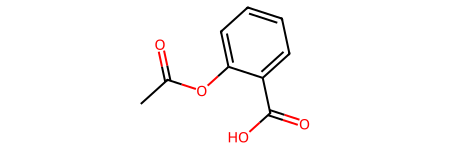

In [ ]:
from rdkit import Chem

# 2D structure of Aspirin
aspirin=Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

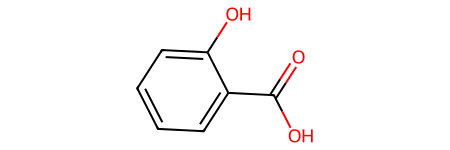

In [ ]:
# 2D structure or molecular graph salicylic acid
salicylic_acid = Chem.MolFromSmiles('O=C(O)c1ccccc1O')
salicylic_acid

In [ ]:
from rdkit.Chem import AllChem, Draw
import numpy as np


In [34]:
# Get the Morgan Fingerprint of both ASPIRIN and SALICYLIC acid

onbit_aspirin={}
onbit_salicylic={}

aspirin_fp=AllChem.GetMorganFingerprintAsBitVect(aspirin,2,2048,bitInfo=onbit_aspirin)
salicylic_fp=AllChem.GetMorganFingerprintAsBitVect(salicylic_acid,2,2048, bitInfo=onbit_salicylic)

# print(np.array(aspirin_fp))
# print('\n')
# print(np.array(salicylic_fp))

[13:51:46] DEPRECATION WARNING: please use MorganGenerator
[13:51:46] DEPRECATION WARNING: please use MorganGenerator


In [35]:
# store the indexes of ON bits

print('Aspirin:',sorted(set(aspirin_fp.GetOnBits())))
print('Salicilyc Acid:',sorted(set(salicylic_fp.GetOnBits())))

Aspirin: [389, 456, 650, 695, 807, 909, 1017, 1035, 1047, 1057, 1088, 1199, 1380, 1410, 1447, 1468, 1616, 1729, 1750, 1775, 1873, 1917, 1970, 1991]
Salicilyc Acid: [389, 456, 650, 807, 1047, 1088, 1199, 1211, 1380, 1447, 1519, 1602, 1607, 1750, 1831, 1873, 1917, 1991]


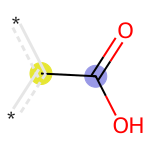

In [36]:
Draw.DrawMorganBit(salicylic_acid,456,bitInfo=onbit_salicylic)

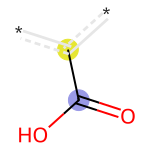

In [37]:
Draw.DrawMorganBit(aspirin,456,bitInfo=onbit_aspirin)

In [38]:
intersection =  set(salicylic_fp.GetOnBits()) & set(aspirin_fp.GetOnBits())

print('Intersection: ',intersection)
print('How many bits? ', len(intersection))

Intersection:  {1088, 1380, 389, 807, 456, 1447, 650, 1991, 1199, 1873, 1750, 1047, 1917}
How many bits?  13


In [39]:
union=set(salicylic_fp.GetOnBits()) | set(aspirin_fp.GetOnBits())
print('Union: ',union)
print('How many bits? ', len(union))

Union:  {1410, 389, 650, 1035, 909, 1047, 1057, 807, 1447, 1831, 1199, 1970, 695, 1211, 1468, 1088, 1729, 1602, 1607, 456, 1991, 1616, 1873, 1750, 1380, 1519, 1775, 1017, 1917}
How many bits?  29


In [40]:
# Tanimoto Coefficient
print("Tanimoto Coefficient:", len(intersection)/len(union))

Tanimoto Coefficient: 0.4482758620689655
